
▎Описание

Этот набор данных был создан с использованием API платформы Binance, одного из крупнейших криптовалютных бирж в мире.

▎Что такое Binance API?

Binance API — это интерфейс программирования приложений, который позволяет разработчикам взаимодействовать с серверами Binance через программный код на таких языках, как Python, Java, JavaScript и других. Используя этот API, трейдеры и разработчики могут автоматизировать процессы торговли, получать доступ к данным о ценах и объемах торгов, а также управлять своими учетными записями.

▎Разновидности API

Binance предлагает несколько типов API, каждый из которых предназначен для определенных задач:

1. RESTful API:
   - Работает на основе HTTP-запросов и позволяет пользователям отправлять запросы для получения или отправки данных. С его помощью можно получить информацию о текущих ценах, исторических данных, а также выполнять торговые операции.

2. WebSocket API:
   - Предоставляет возможность получать потоковые данные в реальном времени. Это особенно полезно для отслеживания изменений цен, объемов торгов и обновлений учетной записи без необходимости постоянно отправлять запросы к серверу.

▎Структура набора данных

Данный набор данных генерируется с интервалом в одну минуту с использованием Binance API. Он включает в себя несколько ключевых столбцов, которые отражают динамику изменения цены Биткоина:

- Цена открытия: стоимость Биткоина в начале минутного интервала.
- Максимальная цена: наивысшая цена Биткоина за минуту.
- Минимальная цена: наименьшая цена Биткоина за минуту.
- Цена закрытия: стоимость Биткоина в конце минутного интервала.
- Объем торгов: количество Биткоинов, проданных за этот интервал времени.

Время открытия и закрытия каждой записи в наборе данных указано в формате метки времени Unix, что позволяет точно отслеживать временные рамки для анализа и визуализации данных.

▎Предметная область

Финансы(?)

▎Реальные данные

Набор данных создан с использованием Binance API, то есть основан на реальных данных о торговле криптовалютой. Эти данные отражают реальные цены, объемы торгов и другие параметры за определенные временные интервалы. Данные были собраны в определённый период (С 1 января 2021 года по 12 мая 2021 года с интервалом в 1 минуту) и не отражают текущую рыночную ситуацию.

▎Описание задачи анализа

В качестве задачи для анализа можем взять прогнозирование цен (построение моделей для прогнозирования цены Биткоина на основе массива данных)  
или
классификацию состояний рынка (классификация состояний рынка (например, "рост", "падение", "стабильность") на основе массива данных)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

https://www.kaggle.com/datasets/aakashverma8900/bitcoin-price-usd

In [5]:
raw_data = pd.read_csv(r"C:\Users\Varia\Documents\3_kurs\machine_learning\bitcoin.csv")

In [20]:
data = raw_data.rename(columns=
                    {'Open Time':'open_time','Open':'open_price','High':'high_price','Low':'low_price','Close':'close_price',
                    'Volume':'volume','Close Time':'close_time','Quote asset volume':'quote_asset_volume',
                    'Number of trades':'number_of_trades','Taker buy base asset volume':'taker_buy_base_asset_volume',
                    'Taker buy quote asset volume':'taker_buy_quote_asset_volume'})

In [21]:
data['open_time'] = pd.to_datetime(data['open_time'], unit='ms')
data['close_time'] = pd.to_datetime(data['close_time'], unit='ms')

In [22]:
data.insert(7,'readable_numbers',None)

In [27]:
data['readable_quote'] = data['quote_asset_volume'].apply(lambda x: f"{x:.2f}")

In [28]:
data[['open_time','open_price','high_price','low_price','close_price','volume','close_time','readable_quote',
      'number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume']]

,open_time,open_price,high_price,low_price,close_price,volume,close_time,readable_quote,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032,2021-01-01 00:00:59.999,794382.04,1292,16.777195,485390.826825
1,2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501,2021-01-01 00:01:59.999,1695802.90,1651,33.733818,978176.468202
2,2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329,2021-01-01 00:02:59.999,1231358.69,986,13.247444,384076.854453
3,2021-01-01 00:03:00,28989.68,28999.85,28972.33,28982.69,30.360677,2021-01-01 00:03:59.999,880016.76,959,9.456028,274083.075142
4,2021-01-01 00:04:00,28982.67,28995.93,28971.80,28975.65,24.124339,2021-01-01 00:04:59.999,699226.21,726,6.814644,197519.374888
...,...,...,...,...,...,...,...,...,...,...,...
188312,2021-05-12 04:35:00,57517.42,57526.28,57485.00,57485.07,42.575735,2021-05-12 04:35:59.999,2448258.07,1195,15.319691,880913.090845
188313,2021-05-12 04:36:00,57485.07,57496.42,57466.75,57481.49,34.205467,2021-05-12 04:36:59.999,1966194.47,1096,15.971891,918058.816162
188314,2021-05-12 04:37:00,57477.18,57509.99,57458.18,57470.00,30.211789,2021-05-12 04:37:59.999,1736514.48,955,13.054229,750364.577319
188315,2021-05-12 04:38:00,57470.00,57470.01,57400.00,57450.90,45.354728,2021-05-12 04:38:59.999,2605079.80,1559,12.615628,724559.233035


In [32]:
data.dtypes

open_time                       datetime64[ns]
open_price                             float64
high_price                             float64
low_price                              float64
close_price                            float64
volume                                 float64
close_time                      datetime64[ns]
readable_numbers                        object
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
readable_quote                          object
dtype: object

open_time: время открытия (временная метка Unix)

open: Цена открытия конкретной минуты

high: самая высокая цена конкретной минуты

low: самая низкая цена конкретной минуты

close: Цена закрытия конкретной минуты

volume: общий объем за определенную минуту.

close_time: время закрытия (временная метка Unix)

quote_asset_volume: объем котируемых активов

number_of_trades: количество сделок за определенную минуту

taker_buy_base_asset_volume: Объем базового актива, купленный Тейкером

taker_buy_quote_asset_volume: Объем активов, купленных Тейкером в цитируемой валюте


In [29]:
data.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,1.883170e+05,188317.000000,188317.000000,1.883170e+05
mean,48807.250870,48850.022846,48764.186791,48807.413975,57.316303,2.678839e+06,1533.133578,28.284067,1.321744e+06
std,9845.576682,9843.437596,9847.738664,9845.500077,60.822888,2.696383e+06,1090.227989,32.633285,1.452640e+06
min,28241.950000,28764.230000,28130.000000,28235.470000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,38457.420000,38496.190000,38415.000000,38458.990000,25.978484,1.266419e+06,933.000000,12.143554,5.912582e+05
50%,51800.000000,51842.340000,51752.100000,51800.000000,39.890078,1.921741e+06,1261.000000,19.136216,9.214739e+05
75%,57054.250000,57092.630000,57014.750000,57054.310000,65.678755,3.089371e+06,1771.000000,32.191799,1.518327e+06
max,64800.000000,64854.000000,64685.170000,64800.000000,1866.939050,1.046984e+08,29164.000000,1179.493861,5.568395e+07


mean - среднее, std - стандартное отклонение

Для каждого атрибута построим гистограмму распределения значений, определим есть ли выбросы

<AxesSubplot:>

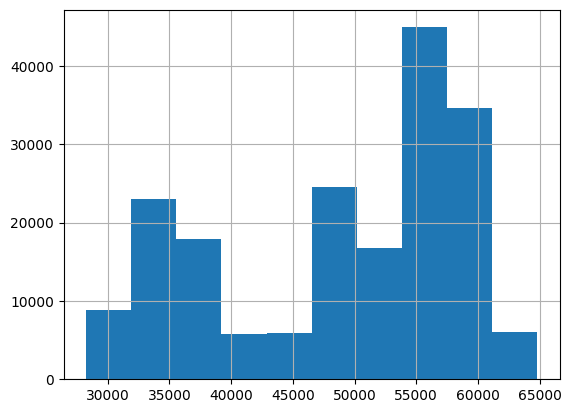

In [33]:
data.open_price.hist()

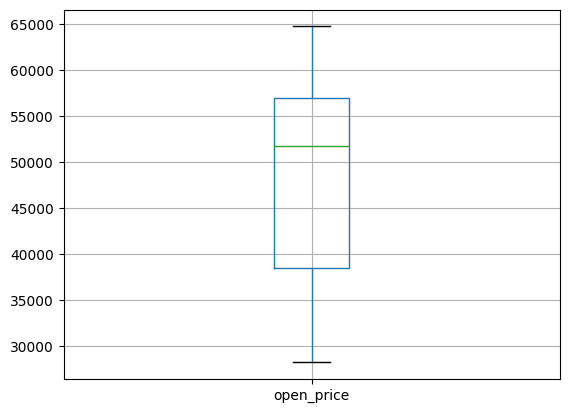

In [34]:
figure_open=data.boxplot(column='open_price')

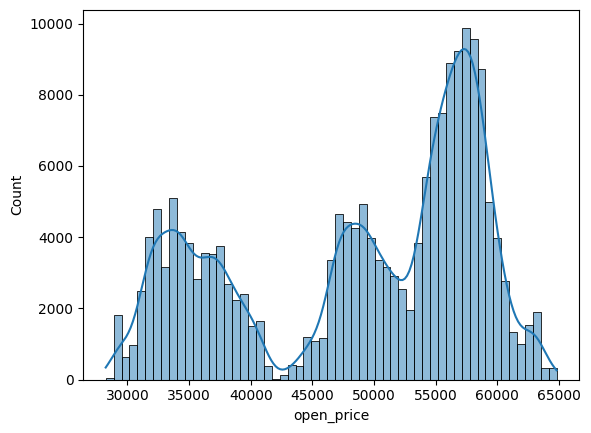

In [44]:
# Удаляем NaN значения
cleaned_data = data['open_price'].dropna()

# Построение гистограммы с наложением оценки плотности
sns.histplot(cleaned_data, kde=True)

# Отображение графика
plt.show()

In [27]:
lower_bound = data['open_price'].mean()-3*data['open_price'].std()
upper_bound = data['open_price'].mean()+3*data['open_price'].std()
print(lower_bound, upper_bound)

19270.520824908537 78343.98091545477


Таким образом, все значения меньшие, чем 19270.52 и большие, чем 78343.98 будут считаться выбросами.

<AxesSubplot:>

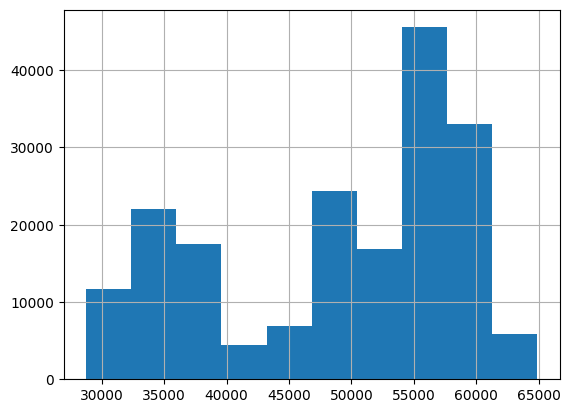

In [35]:
data.high_price.hist()

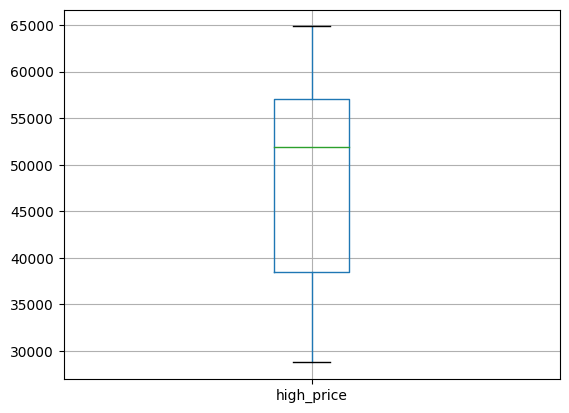

In [38]:
figure_high=data.boxplot(column='high_price')

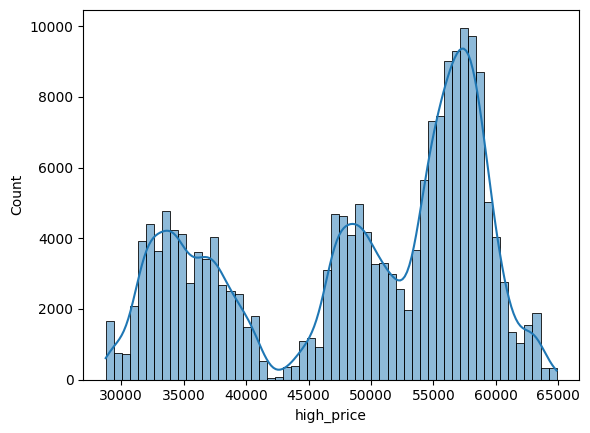

In [39]:
# Удаляем NaN значения
cleaned_data = data['high_price'].dropna()

# Построение гистограммы с наложением оценки плотности
sns.histplot(cleaned_data, kde=True)

# Отображение графика
plt.show()

In [40]:
lower_bound = data['high_price'].mean()-3*data['high_price'].std()
upper_bound = data['high_price'].mean()+3*data['high_price'].std()
print(lower_bound, upper_bound)

19319.710057582015 78380.33563441606


<AxesSubplot:>

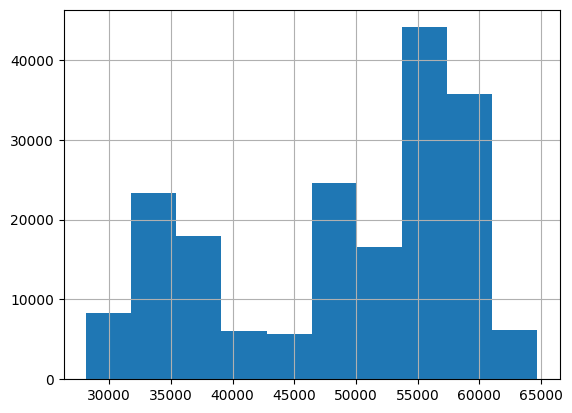

In [41]:
data.low_price.hist()

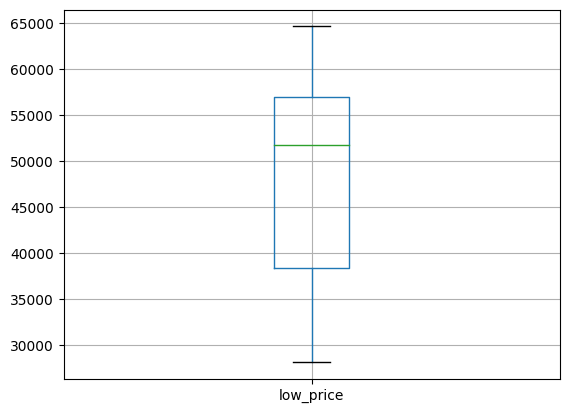

In [42]:
figure_low =data.boxplot(column='low_price')

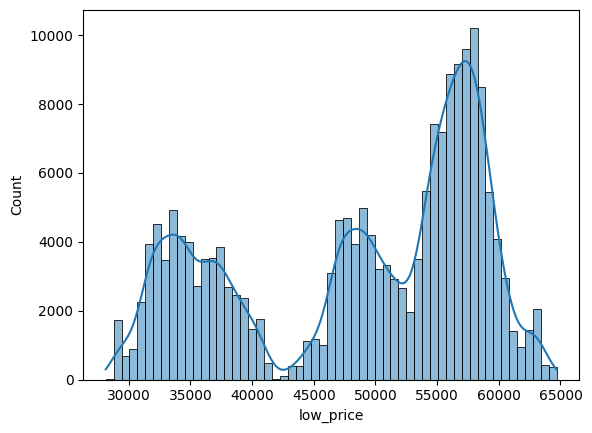

In [45]:
# Удаляем NaN значения
cleaned_data = data['low_price'].dropna()

# Построение гистограммы с наложением оценки плотности
sns.histplot(cleaned_data, kde=True)

# Отображение графика
plt.show()

In [43]:
lower_bound = data['low_price'].mean()-3*data['low_price'].std()
upper_bound = data['low_price'].mean()+3*data['low_price'].std()
print(lower_bound, upper_bound)

19220.970799480107 78307.40278208716


<AxesSubplot:>

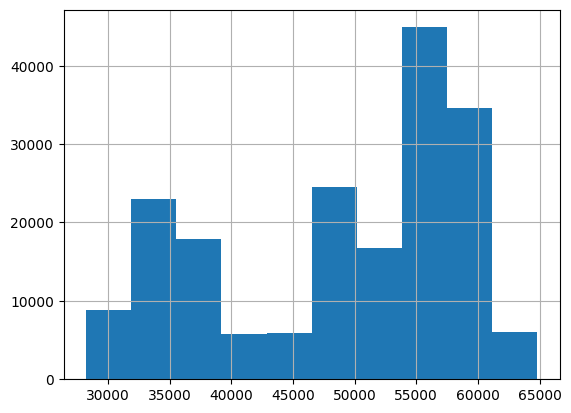

In [46]:
data.close_price.hist()

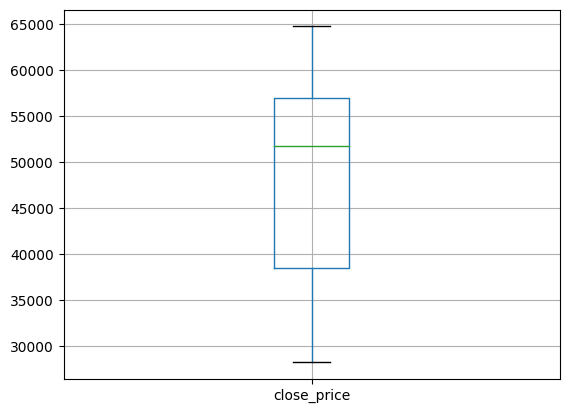

In [47]:
figure_close=data.boxplot(column='close_price')

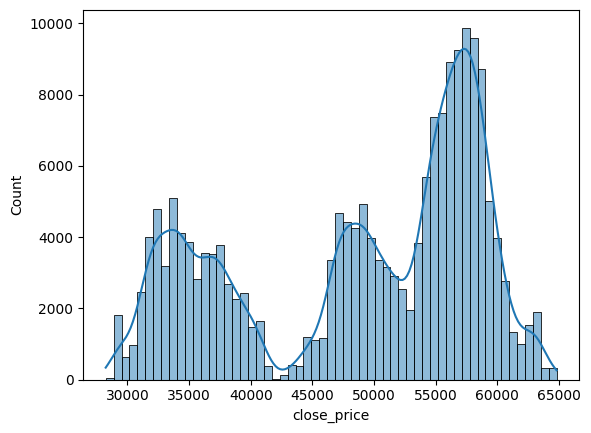

In [48]:
# Удаляем NaN значения
cleaned_data = data['close_price'].dropna()

# Построение гистограммы с наложением оценки плотности
sns.histplot(cleaned_data, kde=True)

# Отображение графика
plt.show()

In [38]:
lower_bound = data['close_price'].mean()-3*data['close_price'].std()
upper_bound = data['close_price'].mean()+3*data['close_price'].std()
print(lower_bound, upper_bound)

19270.913742800294 78343.91420719889


<AxesSubplot:>

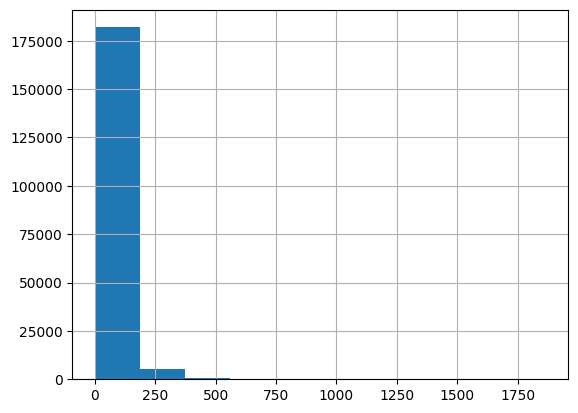

In [50]:
data.volume.hist()

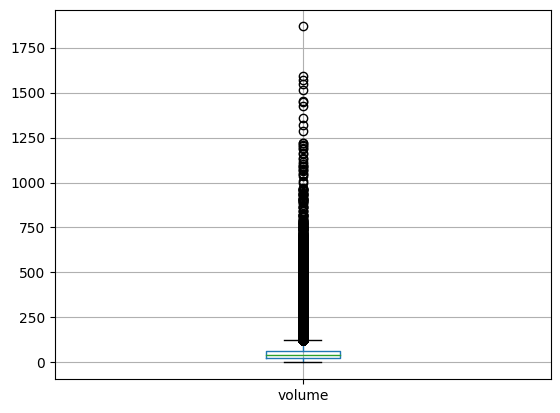

In [51]:
figure_volume = data.boxplot(column='volume')

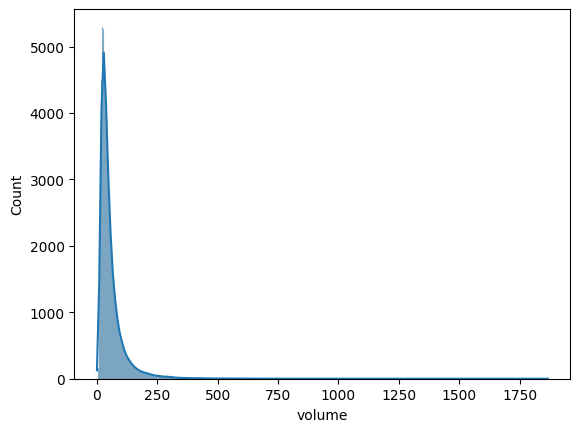

In [49]:
# Удаляем NaN значения
cleaned_data = data['volume'].dropna()

# Построение гистограммы с наложением оценки плотности
sns.histplot(cleaned_data, kde=True)

# Отображение графика
plt.show()

In [52]:
lower_bound = data['volume'].mean()-3*data['volume'].std()
upper_bound = data['volume'].mean()+3*data['volume'].std()
print(lower_bound, upper_bound)

-125.15236004845468 239.78496656069734


<AxesSubplot:>

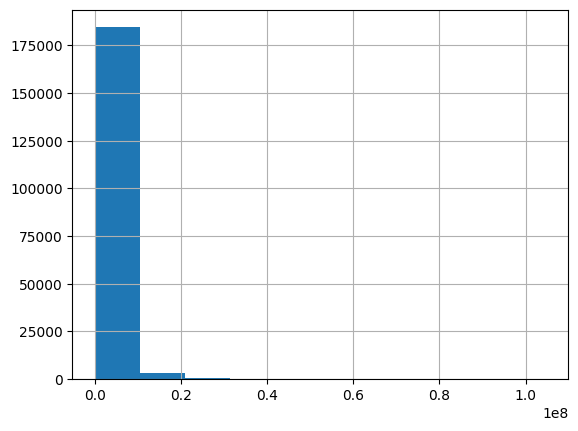

In [20]:
data.quote_asset_volume.hist()

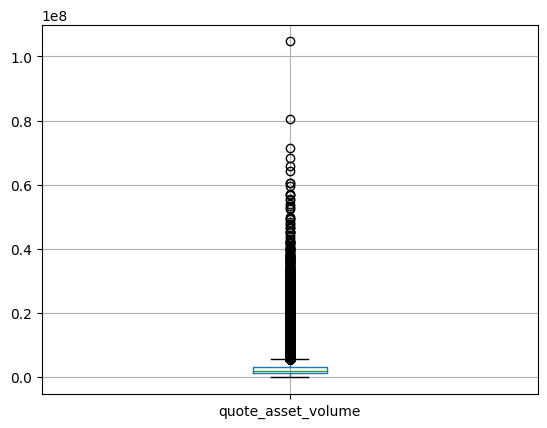

In [49]:
figure_quote_asset_volume = data.boxplot(column='quote_asset_volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='quote_asset_volume', ylabel='Density'>

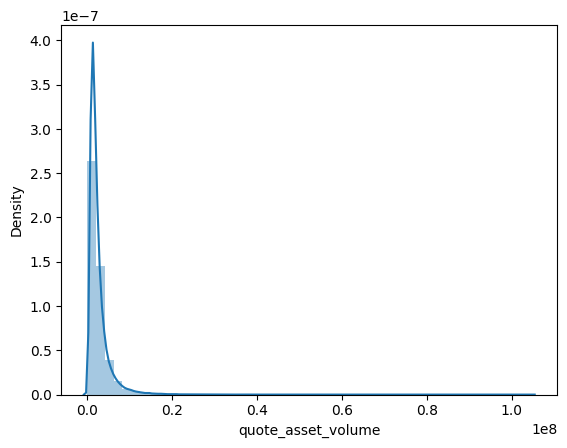

In [50]:
sns.distplot(data['quote_asset_volume'].dropna())

In [51]:
lower_bound = data['quote_asset_volume'].mean()-3*data['quote_asset_volume'].std()
upper_bound = data['quote_asset_volume'].mean()+3*data['quote_asset_volume'].std()
print(lower_bound, upper_bound)

-5410309.868151881 10767987.833650252


<AxesSubplot:>

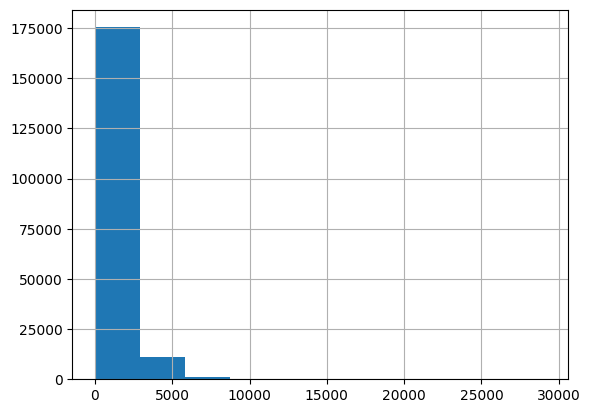

In [21]:
data.number_of_trades.hist()

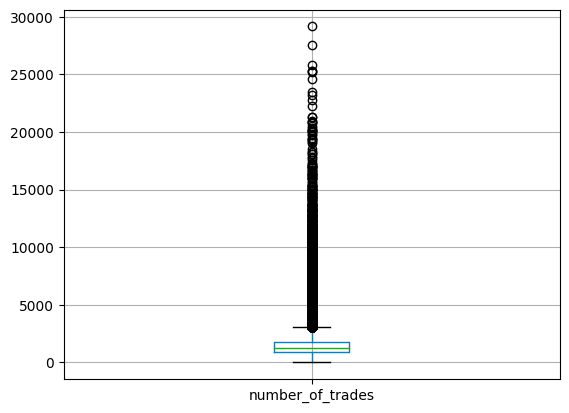

In [52]:
figure_number_of_trades = data.boxplot(column='number_of_trades')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='number_of_trades', ylabel='Density'>

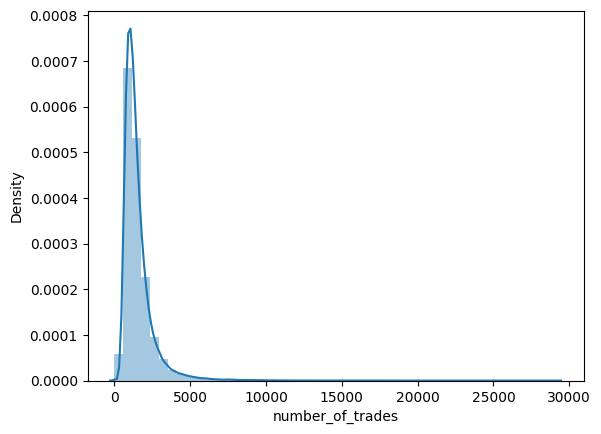

In [53]:
sns.distplot(data['number_of_trades'].dropna())

In [54]:
lower_bound = data['number_of_trades'].mean()-3*data['number_of_trades'].std()
upper_bound = data['number_of_trades'].mean()+3*data['number_of_trades'].std()
print(lower_bound, upper_bound)

-1737.5503900924737 4803.81754600511


<AxesSubplot:>

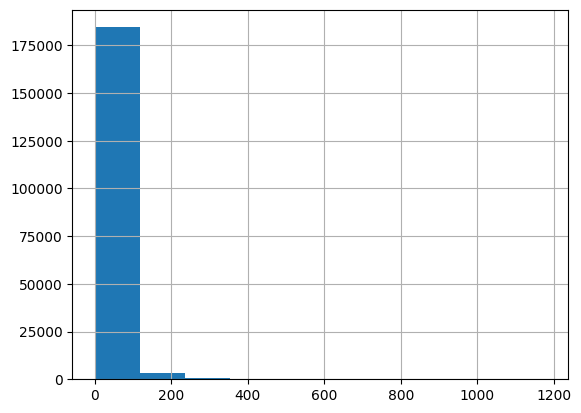

In [22]:
data.taker_buy_base_asset_volume.hist()

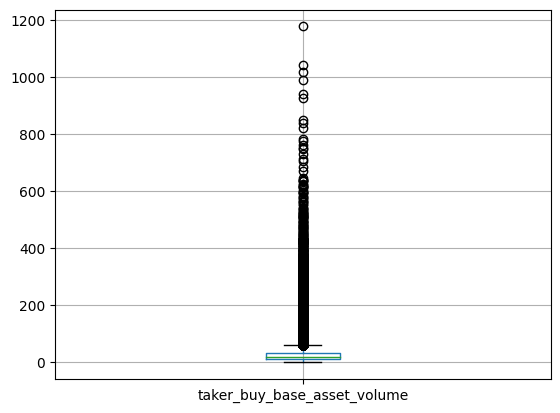

In [55]:
figure_taker_buy_base_asset_volume = data.boxplot(column='taker_buy_base_asset_volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='taker_buy_base_asset_volume', ylabel='Density'>

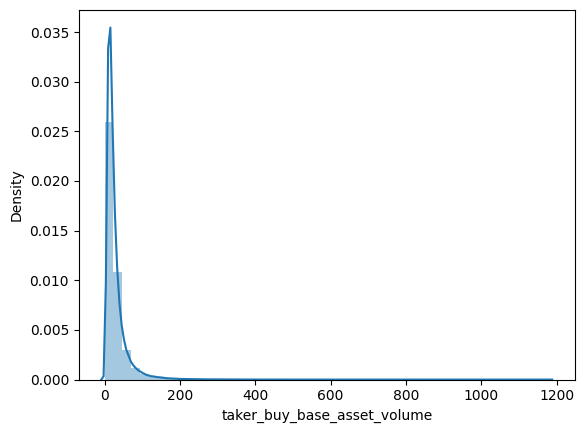

In [56]:
sns.distplot(data['taker_buy_base_asset_volume'].dropna())

In [57]:
lower_bound = data['taker_buy_base_asset_volume'].mean()-3*data['taker_buy_base_asset_volume'].std()
upper_bound = data['taker_buy_base_asset_volume'].mean()+3*data['taker_buy_base_asset_volume'].std()
print(lower_bound, upper_bound)

-69.61578866649819 126.18392313774615


<AxesSubplot:>

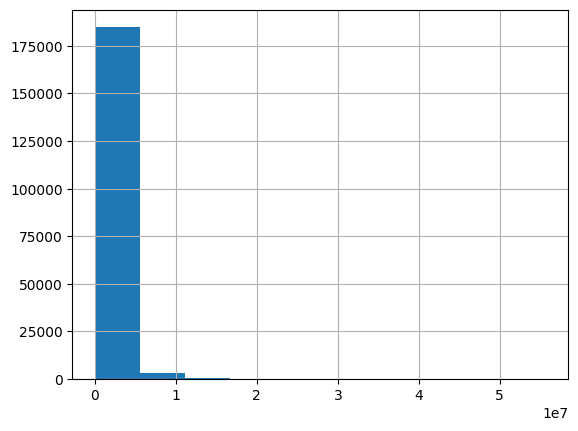

In [23]:
data.taker_buy_quote_asset_volume.hist()

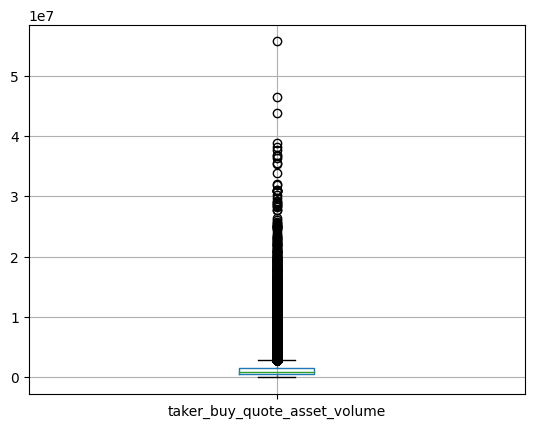

In [58]:
figure_taker_buy_quote_asset_volume = data.boxplot(column='taker_buy_quote_asset_volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='taker_buy_quote_asset_volume', ylabel='Density'>

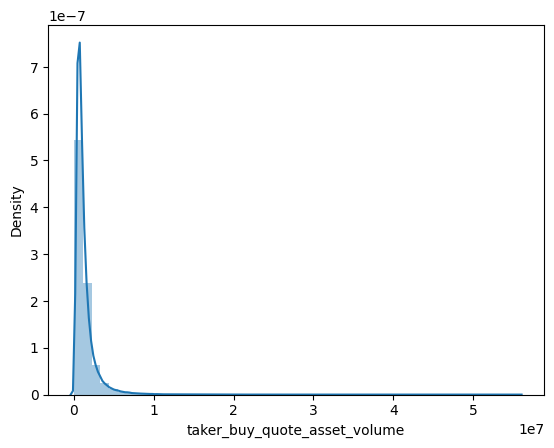

In [59]:
sns.distplot(data['taker_buy_quote_asset_volume'].dropna())

In [60]:
lower_bound = data['taker_buy_quote_asset_volume'].mean()-3*data['taker_buy_quote_asset_volume'].std()
upper_bound = data['taker_buy_quote_asset_volume'].mean()+3*data['taker_buy_quote_asset_volume'].std()
print(lower_bound, upper_bound)

-3036176.255871072 5679663.537420252
